## **Lecture 6. Linear Algebra and Systems of Linear Equations:** 
### **6.5 Numerical Algorithms for Solving $ Ax = y $**

$$ 
\LARGE Ax=y 
$$ 

* **System** $A$ is an $n \times n$ matrix with $rank(A) = n$

* **Unique solution** is an $x \in {\mathbb{R}}^n$ 

* **Measurement** $y \in {\mathbb{R}}^n$. 

#### <font color="cyan">**1. Computational Complexity of Algorithm**</font>
An algorithm is a well-defined sequential computational technique that accepts a value or a collection of values as input and produces the output(s) needed to solve a problem. Complexity in algorithms refers to the amount of resources (such as time or memory) required to solve a problem or perform a task, e.g. solving $Ax = y$. <br/>

1. Using $x = A^{-1}y$, Cramer's rule to solve a N-by-N matrix $A^{-1}$ is $O(N!)$ 

2. Gauss Elimination is $O(N^{3})$, Back substitution is $O(N^{2})$.

3. Gauss-Jordan Elimination is $O(2N^{3})$ ~ $O(N^{3})$

4. LU Decomposition to break one square system to two triangle system, complexity is $O(N^{3})$ via Gauss Elimination, but just do it once.  

5. Iterative Method I: Jacobi, complexity: $O(n^{2}*Iterations)$ (number of rows * number of columns * Iterations)

6. Iterative Method II: Gauss-Seidel, complexity: $O(n^{2}*Iterations)$ but converge faster




![Computational Complexity of Algorithm](sddefault.jpg) <br/>



#### <font color="cyan">**2. Gauss Elimination Method**</font>

The **Gauss Elimination** method is a direct method, turn matrix $A$ into an **upper triangular** form to solve the system of equations. Let's use a system of 4 equations and 4 variables as example: 

$$\begin{bmatrix}
a_{1,1} & a_{1,2} & a_{1,3} & a_{1,4}\\
0 & a_{2,2}' & a_{2,3}' & a_{2,4}'\\
0 & 0 & a_{3,3}' & a_{3,4}' \\
0 & 0 & 0 & a_{4,4}'
\end{bmatrix}\left[\begin{array}{c} x_1 \\x_2 \\ x_3 \\x_4 \end{array}\right] =
\left[\begin{array}{c} y_1 \\y_2' \\ y_3' \\y_4' \end{array}\right]$$

Thus,

\begin{aligned}
\begin{array}{}
 a_{1,1} x_1 &+& a_{1,2} x_2 & + & a_{1,3} x_{3} &+&a_{1,4} x_4 &=& y_1,\\
& & a_{2,2}' x_{2} &+ & a_{2,3}' x_{3} &+& a_{2,4}' x_4 &=& y_{2}' \\
&& & & a_{3,3}' x_{3} &+& a_{3,4}' x_4 &=& y_{3}',\\
&& && && a_{4,4}' x_4 &=& y_{4}'.
\end{array}
\end{aligned}

$$ 
\LARGE Ax = y \rightarrow Ux = y' 
$$ 

We solve the system of equations from bottom-up, this is called **backward substitution**. 

Note that, if $A$ is a lower triangular matrix, we would solve the system from top-down by **forward substitution**.

<font color="magenta">**TRY IT!**</font> Use Gauss Elimination to solve the following equations.

\begin{aligned}
4x_1 + 3x_2 - 5x_3 &=& 2 \\
-2x_1 - 4x_2 + 5x_3 &=& 5 \\
8x_1 + 8x_2  &=& -3 \\
\end{aligned}

**Step 1:** Turn these equations to matrix form $Ax=y$. 

$$
\begin{bmatrix}
4 & 3 & -5\\
-2 & -4 & 5\\
8 & 8 & 0\\
\end{bmatrix}\left[\begin{array}{c} x_1 \\x_2 \\x_3 \end{array}\right] =
\left[\begin{array}{c} 2 \\5 \\-3\end{array}\right]$$

**Step 2:** Get the augmented matrix [A, y] 

$$
[A, y]  = \begin{bmatrix}
4 & 3 & -5 & 2\\
-2 & -4 & 5 & 5\\
8 & 8 & 0 & -3\\
\end{bmatrix}$$

**Step 3:** We choose a **pivot equation**. To do this, we can multiply -0.5 for the 1st row (pivot equation) and subtract it from the 2nd row. 

The multiplier is $m_{2,1}=-0.5$. We will get

$$
\begin{bmatrix}
4 & 3 & -5 & 2\\
0 & -2.5 & 2.5 & 6\\
8 & 8 & 0 & -3\\
\end{bmatrix}$$

**Step 4:** The multiplier is $m_{3,1}=2$. We will get

$$
\begin{bmatrix}
4 & 3 & -5 & 2\\
0 & -2.5 & 2.5 & 6\\
0 & 2 & 10 & -7\\
\end{bmatrix}$$

**Step 5:** The multiplier is $m_{3,2}=-0.8$. We will get

$$
\begin{bmatrix}
4 & 3 & -5 & 2\\
0 & -2.5 & 2.5 & 6\\
0 & 0 & 12 & -2.2\\
\end{bmatrix}$$

&nbsp;

**Step 6:** Backward substitution, we can get $x_3=-2.2/12=-0.183$. 

**Step 7:** Insert $x_3$ to the 2nd equation, we get $x_2=-2.583$

**Step 8:** Insert $x_2$ and $x_3$ to the first equation, we have $x_1=2.208$. 

**Note! (Pivoting)** Sometimes you will have the first element in the 1st row is 0, just switch the first row with a non-zero first element row, then you can do the same procedure as above. 

We are using "pivoting" Gauss Elimination method here, but you should know that there is also a "naive" Gauss Elimination method with the assumption that pivot values will never be zero. 

In [1]:
"""
Example 6.5.1:
Naive Gauss Elimination to solve Ax = y: gauss_solve(A, y) 
Example case in textbook: Python Programming and Numerical Methods 
"""

import numpy as np

##################################
### 1. Naive Gauss Elimination ###
################################## 
def gauss_elimination(A, b):
    n = len(b)
    # Forward elimination
    for k in range(n-1):
        for i in range(k+1, n):
            if A[i][k] == 0: 
                continue
            factor = A[i][k] / A[k][k]
            for j in range(k, n):
                A[i][j] -= factor * A[k][j]
            b[i] -= factor * b[k]
    
    # Back substitution
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        sum_ax = 0
        for j in range(i+1, n):
            sum_ax += A[i][j] * x[j]
        x[i] = (b[i] - sum_ax) / A[i][i]
    return x


########################
### 2. Function Call ###
######################## 
A = np.array([[4,  3, -5], [-2, -4,  5] , [ 8,  8,  0]], dtype=float)
y = np.array([2, 5, -3], dtype=float)

# Funtion call
x = gauss_elimination(A, y)
print(f"Solution by Gauss Elimination x is: {x}")

# check with library
np.allclose(x, np.linalg.solve(A, y)) 

Solution by Gauss Elimination x is: [ 2.20833333 -2.58333333 -0.18333333]


True

#### <font color="cyan">**3. Gauss-Jordan Elimination Method**</font>

Gauss-Jordan method turn $A$ into a diagonal form: 


$$\begin{bmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}\left[\begin{array}{c} x_1 \\x_2 \\ x_3 \\x_4 \end{array}\right] =
\left[\begin{array}{c} y_1' \\y_2' \\ y_3' \\y_4' \end{array}\right]$$

Essentially, the equations become:

\begin{aligned}
\begin{array}{}
x_1 &+& 0 & + & 0 &+&0 &=& y_1',\\
0 &+& x_2 & + & 0 &+&0 &=& y_2' \\
0 &+& 0 & + & x_3 &+&0 &=& y_3',\\
0 &+& 0 & + & 0 &+&x_4 &=& y_4'.
\end{array}
\end{aligned}

$$
\LARGE Ax = y \rightarrow Ix = y'
$$


<font color="magenta">**TRY IT!**</font> Use Gauss-Jordan Elimination to solve the following equations. 

\begin{aligned}
4x_1 + 3x_2 - 5x_3 &=& 2 \\
-2x_1 - 4x_2 + 5x_3 &=& 5 \\
8x_1 + 8x_2  &=& -3 \\
\end{aligned}

**Step 1:** Get the augmented matrix [A, y] 

$$
[A, y]  = \begin{bmatrix}
4 & 3 & -5 & 2\\
-2 & -4 & 5 & 5\\
8 & 8 & 0 & -3\\
\end{bmatrix}$$

**Step 2:** Get the first element in 1st row to 1, we <font color="cyan">divide 4 to the row:</font>
$$
\begin{bmatrix}
1 & 3/4 & -5/4 & 1/2\\
-2 & -4 & 5 & 5\\
8 & 8 & 0 & -3\\
\end{bmatrix}$$

**Step 3:** Eliminate the first element in 2nd and 3rd rows, we multiply -2 and 8 to the 1st row and subtract it from the 2nd and 3rd rows. 

$$
\begin{bmatrix}
1 & 3/4 & -5/4 & 1/2\\
0 & -5/2 & 5/2 & 6\\
0 & 2 & 10 & -7\\
\end{bmatrix}$$

**Step 4:** Normalize the 2nd element in 2nd row to 1, we <font color="cyan">divide -5/2 to achieve this.</font> 

$$
\begin{bmatrix}
1 & 3/4 & -5/4 & 1/2\\
0 & 1 & -1 & -12/5\\
0 & 2 & 10 & -7\\
\end{bmatrix}$$

**Step 5:** Eliminate the 2nd element the 3rd row, we multiply 2 to the 2nd row and subtract it from the 3rd row. 

$$
\begin{bmatrix}
1 & 3/4 & -5/4 & 1/2\\
0 & 1 & -1 & -12/5\\
0 & 0 & 12 & -11/5\\
\end{bmatrix}$$

**Step 6:**  Normalize the last row by divide 12.

$$
\begin{bmatrix}
1 & 3/4 & -5/4 & 1/2\\
0 & 1 & -1 & -12/5\\
0 & 0 & 1 & -11/60\\
\end{bmatrix}$$

**Step 7:** Eliminate the 3rd element in 2nd row by multiply -1 to the 3rd row and subtract it from the 2nd row. 

$$
\begin{bmatrix}
1 & 3/4 & -5/4 & 1/2\\
0 & 1 & 0 & -155/60\\
0 & 0 & 1 & -11/60\\
\end{bmatrix}$$

**Step 8:** Eliminate the 3rd element in 1st row by multiply -5/4 to the 3rd row and subtract it from the 1st row. 

$$
\begin{bmatrix}
1 & 3/4 & 0 & 13/48\\
0 & 1 & 0 & -2.583\\
0 & 0 & 1 & -0.183\\
\end{bmatrix}$$

**Step 9:** Eliminate the 2nd element in 1st row by multiply 3/4 to the 2nd row and subtract it from the 1st row. 

$$
\begin{bmatrix}
1 & 0 & 0 & 2.208\\
0 & 1 & 0 & -2.583\\
0 & 0 & 1 & -0.183\\
\end{bmatrix}$$

In [ ]:
"""
Example 6.5.2:
Gauss-Jordan Elimination to solve Ax = y: gauss_jordan_solve(A, y).
This method will add partial pivoting.  
"""
import numpy as np

#########################################################
### 1. Gauss_Jordan Elimination with Partial Pivoting ###
######################################################### 
def gauss_jordan_elimination(A, y):
    n = len(y)
    augmented_matrix = np.column_stack((A, y))
    
    for i in range(n):
        # Find the pivot row
        pivot_row = np.argmax(np.abs(augmented_matrix[i:, i])) + i          # fix column and then slice over the row
        augmented_matrix[[i, pivot_row]] = augmented_matrix[[pivot_row, i]] # row swapping after re-index   
        
        # Normalize the pivot row
        augmented_matrix[i] /= augmented_matrix[i, i]
        
        # Eliminate other rows
        for j in range(n):
            if j != i:
                augmented_matrix[j] -= augmented_matrix[j, i] * augmented_matrix[i]
    
    # Extract the solution
    x = augmented_matrix[:, -1]
    return x

########################
### 2. Function Call ###
######################## 
A = np.array([[4,  3, -5], [-2, -4,  5] , [ 8,  8,  0]], dtype=float)
y = np.array([2, 5, -3], dtype=float)

# Swapping rows 0 and 2 of the array using NumPy indexing
A[[0, 2], :] = A[[2, 0], :]
y[0], y[2] = y[2], y[0]
print(f"reorder of A: \n{A}\n")
print(f"reorder of y: {y}\n")

# Using Gaussian-Jordan method
x = gauss_jordan_elimination(A, y)
print(f"Solution by Gauss-Jordan x is:\n{x}\n")

# check with library
np.allclose(x, np.linalg.solve(A, y)) 


reorder of A: 
[[ 8.  8.  0.]
 [-2. -4.  5.]
 [ 4.  3. -5.]]

reorder of y: [-3.  5.  2.]

Solution by Gauss-Jordan x is:
[ 2.20833333 -2.58333333 -0.18333333]



True

#### <font color="cyan">**4. LU Decomposition Method**</font>

The $LU$ decomposition method aims to turn $A = LU$, where $L$ is a lower triangular matrix while $U$ is an upper triangular matrix. <br>

With this decomposition, we convert the system from one rectangle $Ax = y$ to two triangular sysytem:

$$LUx=y\rightarrow
\begin{bmatrix}
l_{1,1} & 0 & 0 & 0\\
l_{2,1} & l_{2,2} & 0 & 0\\
l_{3,1} & l_{3,2} & l_{3,3} & 0 \\
l_{4,1} & l_{4,2} & l_{4,3} & l_{4,4}
\end{bmatrix}
\begin{bmatrix}
u_{1,1} & u_{1,2} & u_{1,3} & u_{1,4}\\
0 & u_{2,2} & u_{2,3} & u_{2,4}\\
0 & 0 & u_{3,3} & u_{3,4} \\
0 & 0 & 0 & u_{4,4}
\end{bmatrix}\left[\begin{array}{c} x_1 \\x_2 \\ x_3 \\x_4 \end{array}\right] =
\left[\begin{array}{c} y_1 \\y_2 \\ y_3 \\y_4 \end{array}\right]$$
<br> <br/>

**Step 1, Solving $m$:** Foward substitution $L(Ux)=Lm=y$: <br> </br>

$$
\begin{bmatrix}
l_{1,1} & 0 & 0 & 0\\
l_{2,1} & l_{2,2} & 0 & 0\\
l_{3,1} & l_{3,2} & l_{3,3} & 0 \\
l_{4,1} & l_{4,2} & l_{4,3} & l_{4,4}
\end{bmatrix}m =
\left[\begin{array}{c} y_1 \\y_2 \\ y_3 \\y_4 \end{array}\right]$$

**Step 2, Solving $x$:** backward substitution $Ux=m$ <br> </br>

$$
\begin{bmatrix}
u_{1,1} & u_{1,2} & u_{1,3} & u_{1,4}\\
0 & u_{2,2} & u_{2,3} & u_{2,4}\\
0 & 0 & u_{3,3} & u_{3,4} \\
0 & 0 & 0 & u_{4,4}
\end{bmatrix}\left[\begin{array}{c} x_1 \\x_2 \\ x_3 \\x_4 \end{array}\right] =
\left[\begin{array}{c} m_1 \\m_2 \\ m_3 \\m_4 \end{array}\right]$$

**How to get $L$ and $U$ matrices? By Gaussian elimination!**

$$A=
\begin{bmatrix}
1 & 0 & 0 & 0\\
m_{2,1} & 1 & 0 & 0\\
m_{3,1} & m_{3,2} & 1 & 0 \\
m_{4,1} & m_{4,2} & m_{4,3} & 1
\end{bmatrix}
\begin{bmatrix}
u_{1,1} & u_{1,2} & u_{1,3} & u_{1,4}\\
0 & u_{2,2} & u_{2,3} & u_{2,4}\\
0 & 0 & u_{3,3} & u_{3,4} \\
0 & 0 & 0 & u_{4,4}
\end{bmatrix}$$
<br> </br>
Let's see the above example, where $U$ is the one we used before to solve the equations, and $L$ is composed of the multipliers (you can check the examples in the Gauss Elimination section). 




$$
L = \begin{bmatrix}
1 & 0 & 0 \\
-0.5 & 1 & 0 \\
2 & -0.8 & 1 \\
\end{bmatrix}$$

$$
U = \begin{bmatrix}
4 & 3 & -5 \\
0 & -2.5 & 2.5 \\
0 & 0 & 60 \\
\end{bmatrix}$$


In [ ]:
"""
Example 6.5.3: Naive LU decompostion A = LU (with no pivoting)
Note the multipliers are the entries in L
"""
import numpy as np

####################################################
### 1. LU Decomposition without Partial Pivoting ###
#################################################### 
def lu(A):
    
    # Get the number of rows
    m = A.shape[0]
    
    # shallow copy
    U = A.copy()
    L = np.eye(m, dtype=np.double)
    
    # Loop over rows
    for i in range(m):
            
        # Eliminate entries below i with row operations on U 
        # and reverse the row operations to manipulate L
        # multiplier in L = factor
        factor = U[i+1:, i] / U[i, i]
        L[i+1:, i] = factor
        U[i+1:] -= factor[:, np.newaxis] * U[i]
        
    return L, U

########################
### 2. Function Call ###
######################## 
A = np.array([[4, 3, -5], [-2, -4, 5], [8, 8, 0]], dtype=float)

# Using Naive LU decompostion
L, U = lu(A)
print(f"A: \n{A}\n")
print(f"L: \n{L}\n")
print(f"U: \n{U}\n")

# check with library scipy PA = LU
from scipy.linalg import lu as plu
P_new, L_new, U_new = plu(A)
print(f"P_new: \n{P_new}\n")
print(f"L_new: \n{L_new}\n")
print(f"U_new: \n{U_new}\n")
np.isclose(L, L_new) 



A: 
[[ 4.  3. -5.]
 [-2. -4.  5.]
 [ 8.  8.  0.]]

L: 
[[ 1.   0.   0. ]
 [-0.5  1.   0. ]
 [ 2.  -0.8  1. ]]

U: 
[[ 4.   3.  -5. ]
 [ 0.  -2.5  2.5]
 [ 0.   0.  12. ]]

P_new: 
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]

L_new: 
[[ 1.    0.    0.  ]
 [-0.25  1.    0.  ]
 [ 0.5   0.5   1.  ]]

U_new: 
[[ 8.   8.   0. ]
 [ 0.  -2.   5. ]
 [ 0.   0.  -7.5]]



array([[ True,  True,  True],
       [False,  True,  True],
       [False, False,  True]])

#### <font color=red>**Homework#2**</font> 

Refer to Example 6.5.2 and 6.5.3, please add the parital pivoting to 6.5.3 (LU decomposition) and then equal to the results by scipy.linalg.lu(A).



#### <font color="cyan">**5. Iterative Method: Jacobi and Gauss-Seidel Method**</font>

**Direct Method v.s. Iterative Methods**

$$\begin{bmatrix}
a_{1,1} & a_{1,2} & ... & a_{1,n}\\
a_{2,1} & a_{2,2} & ... & a_{2,n}\\
... & ... & ... & ... \\
a_{m,1} & a_{m,2} & ... & a_{m,n}
\end{bmatrix}\left[\begin{array}{c} x_1 \\x_2 \\ ... \\x_n \end{array}\right] =
\left[\begin{array}{c} y_1 \\y_2 \\ ... \\y_m \end{array}\right]$$
we can write its explicit form as:

$$
x_i = \frac{1}{a_{i,i}}\Big[y_i - \sum_{j=1, j \ne i}^{j=n}{a_{i,j}x_j} \Big]
$$

This is the basics of the iterative methods, we can assume initial values for all the $x$, and use it as $x^{(0)}$. In the first iteration, we can substitute $x^{(0)}$ into the right-hand side of the explicit equation above, and get the first iteration solution $x^{(1)}$. Thus, we can substitute $x^{(1)}$ into the equation and get substitute $x^{(2)}$. The iterations continue until the difference between $x^{(k)}$ and $x^{(k-1)}$ is smaller than some pre-defined value. 

In order to have the iterative methods work, we do need specific condition for the solution to converge. A sufficient but not necessary condition of the convergence is the coefficient matrix $a$ is a **diagonally dominant**. This means that in each row of the matrix of coefficients $a$, the absolute value of the diagonal element is greater than the sum of the absolute values of the off-diagonal elements. If the coefficient matrix satisfy the condition, the iteration will converge to the solution. The solution might still converge even when this condition is not satisfied.

We will introduce two interative methods: **(1) Jacobi Method** and **(2) Gauss-Seidel Method** solve the the system of linear equations. 

<font color="magenta">**Try It:**</font> Solve the following system of linear equations using iterative method, use a pre-defined threshold $\epsilon = 0.001$ or iterarion number $N$. 

Do remember to check if the converge condition is satisfied or not. 

\begin{aligned}
8x_1 + 2x_2 + 3x_3   &=& 14 \\
2x_1 - 8x_2 + 5x_3  &=& 5 \\
3x_1 + 5x_2 + 10x_3 & =& -8 \\
\end{aligned}

Let us first check if the coefficient matrix is strict diagonally dominant (SDD) or not. 

Since it is guaranteed to converge, both (1) Gauss-Seidel (2) Jacobi method works. 

<font color="red"> **textbook code in p. 255 (14.4.4.1) shall be corrected** </font>

In [25]:
"""
Example 6.5.4A:
Solving Ax = b by iterative method, first check its strict diagonally dominant (SDD) condition
"""
import numpy as np

##############################
### 1. Check SDD condition ###
##############################

A = np.array([[8, 2, 3], [3, -8, 5], [3, 5, 10]], dtype=float)

# Find diagonal coefficients
diag = np.diag(np.abs(A)) 
print(f"pivots: {diag}\n")

# Find row sum without diagonal
off_diag = np.sum(np.abs(A), axis=1) - diag 
print(f"sum of off-diagonal entries: {off_diag}\n")

if np.all(diag > off_diag):
    print('matrix is diagonally dominant')
else:
    print('NOT diagonally dominant')

pivots: [ 8.  8. 10.]

sum of off-diagonal entries: [5. 7. 8.]

matrix is diagonally dominant


#### <font color= "cyan"> **Jacobi Method** </font> ####

In [1]:
""" 
Example 6.5.5:
Solving Ax = y by Iterative Jacobi Method
"""
import numpy as np
from numpy.linalg import norm
A = np.array([[8, 2, 3], [2, -8, 5], [3, 5, 10]], dtype=float)
y = np.array([14, 5, -8], dtype=float)

# inital guess 
x1 = 0
x2 = -1
x3 = 0
x = np.array([x1, x2, x3])  

# state trajectory in 2D array
state_traj = x[:, None] 

# iteration condition
epsilon = 0.001
iteration = 100

# setting error > 2*epsilon
# iteration state tracking 
error = 2*epsilon 
iter_number = 0 

print('Iteration results:')
print('k,  x1,    x2,    x3,    L2-error')

# we have to update the coefficients x1, x2, x3
# and appendix the new x in state_traj    

while ((error > epsilon) and (iter_number < iteration)):
    iter_number += 1
    # x1 = (        -2*x2  - 3*x3   + 14) / (8)
    # x2 = (-2*x1          - 5*x3   +  5) /(-8)
    # x3 = (-3*x1   -5*x2           -  8) /(10) 
    # written in matrix form x_(k+1) = M*x_(k) + b_0
       
    M = np.array([[0, -2/8, -3/8], [-2/-8, 0, -5/-8], [-3/10, -5/10, 0]], dtype=float)  
    b_0 = np.array([14/8, 5/-8, -8/10])
    x = np.dot(M, x) + b_0
        
    state_traj = np.hstack((state_traj, x[:,None]))
    error = norm((state_traj[:,iter_number] - state_traj[:,iter_number-1]), 2)
    print("%d, %.4f, %.4f, %.4f, %.4f" %(iter_number, x[0], x[1], x[2], error))

# solution x1=2.36, x2=-0.75, x3=-1.13


Iteration results:
k,  x1,    x2,    x3,    L2-error
1, 2.0000, -0.6250, -0.3000, 2.0568
2, 2.0187, -0.3125, -1.0875, 0.8474
3, 2.2359, -0.8000, -1.2494, 0.5577
4, 2.4185, -0.8469, -1.0708, 0.2597
5, 2.3633, -0.6896, -1.1021, 0.1696
6, 2.3357, -0.7230, -1.1642, 0.0757
7, 2.3673, -0.7687, -1.1392, 0.0609
8, 2.3694, -0.7452, -1.1259, 0.0271
9, 2.3585, -0.7363, -1.1382, 0.0187
10, 2.3609, -0.7468, -1.1394, 0.0108
11, 2.3640, -0.7469, -1.1349, 0.0054
12, 2.3623, -0.7433, -1.1357, 0.0040
13, 2.3617, -0.7443, -1.1370, 0.0017
14, 2.3625, -0.7452, -1.1364, 0.0014
15, 2.3624, -0.7446, -1.1361, 0.0006


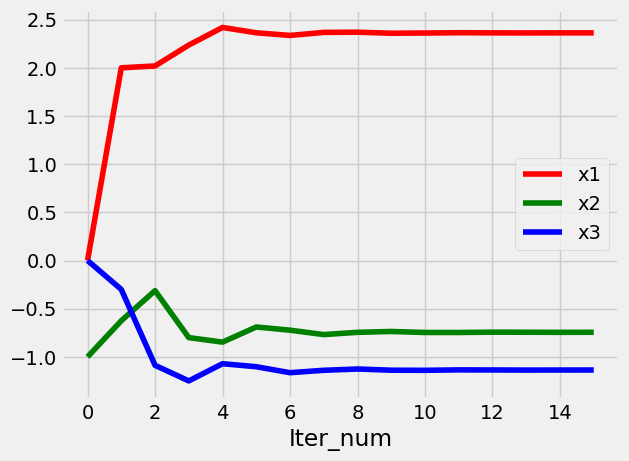

In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()

t = np.arange(iter_number+1)
ax.plot(t, state_traj[0,t], 'r', label="x1")
ax.plot(t, state_traj[1,t], 'g', label="x2")
ax.plot(t, state_traj[2,t], 'b', label="x3")

ax.set_xlabel("Iter_num")
ax.legend()  

# solution x1=2.36, x2=-0.75, x3=-1.13

In [43]:
### check the eigenvalue of Jacobi matrix ###
import numpy
from numpy.linalg import eig, inv

D = np.diag(np.diag(A))
T = A - D
w, v = eig(-numpy.linalg.inv(D) @ T)

print(f"{abs(w)}\n")
print(f"{v}\n")


[0.27656038 0.58222474 0.58222474]

[[ 0.85174194+0.j          0.26082474-0.3488612j   0.26082474+0.3488612j ]
 [-0.25916662+0.j         -0.73107731+0.j         -0.73107731-0.j        ]
 [-0.45537713+0.j          0.05741972-0.52201078j  0.05741972+0.52201078j]]



In [64]:
""" 
Example 6.5.6A:
Solving Ax = y by Iterative Gauss-Seidel Method
"""
import numpy as np
from numpy.linalg import norm

A = np.array([[8, 2, 3], [2, -8, 5], [3, 5, 10]], dtype=float)
y = np.array([14, 5, -8], dtype=float)

# inital guess 
x1 = 0
x2 = 0
x3 = 0
x_0 = np.array([x1, x2, x3])  

# state trajectory in 2D array
state_traj = x_0[:, None] 

# iteration condition
epsilon = 0.001
iteration = 100

# setting error > 2*epsilon
# iteration state tracking 
error = 2*epsilon 
iter_number = 0 
print("Iteration results: ")
print("k,   x1,    x2,    x3,   L2-error")

# we have to update the coefficients x1, x2, x3 and appendix the new x in state_traj    
while ((error > epsilon) and (iter_number < iteration)):
    iter_number += 1
    # x1 = (        -2*x2  - 3*x3   + 14) / (8)
    # x2 = (-2*x1          - 5*x3   +  5) /(-8)
    # x3 = (-3*x1   -5*x2           -  8) /(10) 
        
    x1 = (        -2*x2  - 3*x3   + 14) / (8)
    x2 = (-2*x1          - 5*x3   +  5) /(-8)
    x3 = (-3*x1   -5*x2           -  8) /(10) 
    x = np.array([x1, x2, x3]) 
    state_traj = np.hstack((state_traj, x[:, None]))
    error = norm((state_traj[:, iter_number] - state_traj[:, iter_number-1]), 2)
    print(f"{iter_number}, {x[0]:.2f}, {x[1]:.2f}, {x[2]:.2f},   {error:.2f}")    
# solution x1=2.36, x2=-0.75, x3=-1.13

# check the results
print()
print(f"solution x is: {x}\n")
np.allclose(A@x, y, rtol = 1e-3)

Iteration results: 
k,   x1,    x2,    x3,   L2-error
1, 1.75, -0.19, -1.23,   2.15
2, 2.26, -0.83, -1.06,   0.84
3, 2.36, -0.70, -1.16,   0.19
4, 2.36, -0.76, -1.13,   0.06
5, 2.36, -0.74, -1.14,   0.02
6, 2.36, -0.75, -1.14,   0.01
7, 2.36, -0.74, -1.14,   0.00
8, 2.36, -0.74, -1.14,   0.00

solution x is: [ 2.36227038 -0.74486356 -1.13624933]



True

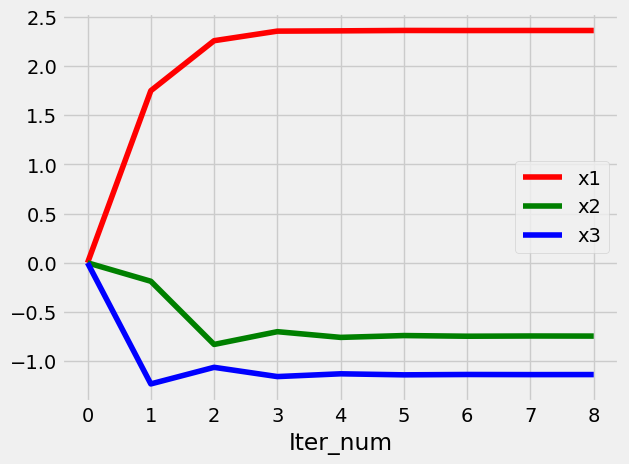

In [24]:
""" 
Plot state_trajectory of Iterative Gauss-Seidel Method
"""
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()

t = np.arange(iter_number+1)
ax.plot(t, state_traj[0,t], 'r', label="x1")
ax.plot(t, state_traj[1,t], 'g', label="x2")
ax.plot(t, state_traj[2,t], 'b', label="x3")

ax.set_xlabel("Iter_num")
ax.legend()  

In [66]:
""" 
Example 6.5.6B:
Solving Ax = y by Iterative Gauss-Seidel method, rewritten in matrix form
"""
# A = np.array([[8, 2, 3], [2, -8, 5], [3, 5, 10]], dtype=float)
# y = np.array([14, 5, -8], dtype=float)

# inital guess 
x1 = 0
x2 = 0
x3 = 0
x = np.array([x1, x2, x3])  

# state trajectory in 2D array
state_traj = x[:, None] 

# iteration condition
epsilon = 0.001
iteration = 100

# setting error > 2*epsilon
# iteration state tracking 
error = 2*epsilon 
iter_number = 0 

print('Iteration results:')
print('k,  x1,    x2,    x3,    L2-error')

# we have to update the coefficients x1, x2, x3
# and appendix the new x in state_traj    

while ((error > epsilon) and (iter_number < iteration)):
    iter_number += 1
    # x1 = (        -2*x2  - 3*x3   + 14) / (8)
    # x2 = (-2*x1          - 5*x3   +  5) /(-8)
    # x3 = (-3*x1   -5*x2           -  8) /(10) 
   
    B = np.array([[1, 0, 0],[-2/8, 1, 0],[3/10, 5/10, 1]], dtype=float)    
    M = inv(B) @ np.array([[0, -2/8, -3/8], [0, 0, -5/-8], [0, 0, 0]], dtype=float) 
    b_0 = inv(B) @ np.array([14/8, 5/-8, -8/10], dtype=float)
    x = np.dot(M, x) + b_0

    state_traj = np.hstack((state_traj, x[:,None]))
    error = norm((state_traj[:,iter_number] - state_traj[:,iter_number-1]), 2)
    print("%d, %.4f, %.4f, %.4f, %.4f" %(iter_number, x[0], x[1], x[2], error))

# check the results
print()
print(f"solution x is: {x}\n")
np.allclose(A@x, y, rtol = 1e-3)

Iteration results:
k,  x1,    x2,    x3,    L2-error
1, 1.7500, -0.1875, -1.2312, 2.1479
2, 2.2586, -0.8299, -1.0626, 0.8365
3, 2.3560, -0.7002, -1.1567, 0.1875
4, 2.3588, -0.7582, -1.1285, 0.0646
5, 2.3628, -0.7396, -1.1390, 0.0217
6, 2.3620, -0.7464, -1.1354, 0.0077
7, 2.3624, -0.7440, -1.1367, 0.0027
8, 2.3623, -0.7449, -1.1362, 0.0009

solution x is: [ 2.36227038 -0.74486356 -1.13624933]



True

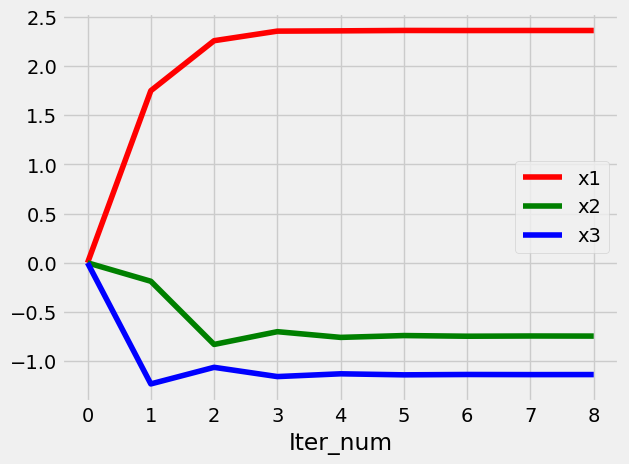

In [65]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()

t = np.arange(iter_number+1)
ax.plot(t, state_traj[0,:], 'r', label="x1")
ax.plot(t, state_traj[1,:], 'g', label="x2")
ax.plot(t, state_traj[2,:], 'b', label="x3")

ax.set_xlabel("Iter_num")
ax.legend()  

In [67]:
""" 
Example 6.5.7:
Convergence test by eigenvalues with (1) Jacobi and (2) Gauss-Seidel Method
"""
from numpy.linalg import eig, inv


A = np.array([[8, 2, 3], [2, -8, 5], [3, 5, 10]], dtype=float)

# Jacobi A = D + T1
D = np.diag(np.diag(A))
print(f"Diagonal matrix D:\n{D}\n")
T1 = A - D
print(f"else matrix T1:\n{T1}\n")
w1, v1 = eig(np.dot(-inv(D), T1))
print(f"eigenvalues of Jacobi's are {abs(w1)}\n")


# Gauss-Seidel A = L + T2
L = np.tril(A)
print(f"Lower triangular matrix L:\n{L}\n")
T2 = A - L
print(f"else matrix T1:\n{T2}\n")
w2, v2 = eig(np.dot(-inv(L), T2))
print(f"eigenvalues of Gauss-Seidel's are {abs(w2)}\n")

np.greater(abs(w1), abs(w2))

Diagonal matrix D:
[[ 8.  0.  0.]
 [ 0. -8.  0.]
 [ 0.  0. 10.]]

else matrix T1:
[[0. 2. 3.]
 [2. 0. 5.]
 [3. 5. 0.]]

eigenvalues of Jacobi's are [0.27656038 0.58222474 0.58222474]

Lower triangular matrix L:
[[ 8.  0.  0.]
 [ 2. -8.  0.]
 [ 3.  5. 10.]]

else matrix T1:
[[0. 2. 3.]
 [0. 0. 5.]
 [0. 0. 0.]]

eigenvalues of Gauss-Seidel's are [0.        0.1340522 0.3496772]



array([ True,  True,  True])

___